In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras
from keras import callbacks

In [2]:
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
%%time
model = models.Sequential()
model.add(layers.Conv2D(256,(3,3), activation='elu', input_shape=(32, 32, 3), padding= 'same', kernel_initializer= 'he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3,3),activation='elu', padding= 'same',kernel_initializer= 'he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3,3), activation='elu', padding='same',kernel_initializer= 'he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3),activation='elu', padding='same',kernel_initializer= 'he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.2))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3),activation='elu', padding = 'same',kernel_initializer= 'he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='elu', padding = 'same',kernel_initializer= 'he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.2))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3,3), activation='elu', padding='same',kernel_initializer= 'he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3),activation='elu', padding='same',kernel_initializer= 'he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(.2))


CPU times: user 238 ms, sys: 9.88 ms, total: 247 ms
Wall time: 254 ms


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       2

In [6]:
model.add(layers.Flatten(input_shape = (8,8,128)))
model.add(layers.Dense(64, activation= 'elu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation= 'elu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation= 'elu'))
model.add(layers.BatchNormalization())
#model.add(layers.Dense(256, activation= 'relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation= 'elu'))
model.add(layers.Dropout(.2))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       2

In [8]:
%%time


earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs= 100, 
                    validation_data=(test_images, test_labels), callbacks = [earlystopping])

Epoch 1/100
1563/1563 [==============================] - 50s 29ms/step - loss: 1.8098 - accuracy: 0.3626 - val_loss: 1.1452 - val_accuracy: 0.6189
Epoch 2/100
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2446 - accuracy: 0.5778 - val_loss: 0.8400 - val_accuracy: 0.7421
Epoch 3/100
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0607 - accuracy: 0.6411 - val_loss: 0.9111 - val_accuracy: 0.7114
Epoch 4/100
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9617 - accuracy: 0.6771 - val_loss: 0.8351 - val_accuracy: 0.7344
Epoch 5/100
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8644 - accuracy: 0.7104 - val_loss: 0.8062 - val_accuracy: 0.7483
Epoch 6/100
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8168 - accuracy: 0.7272 - val_loss: 0.6494 - val_accuracy: 0.7981
Epoch 7/100
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7573 - accuracy: 0.7488 - val_loss: 0

313/313 - 3s - loss: 0.5103 - accuracy: 0.8545


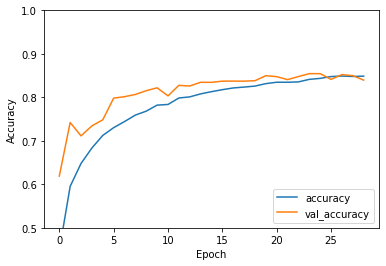

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.8544999957084656


In [13]:
model.save('C:/CIFAR/Mobley_model.h5') 

new_model = tf.keras.models.load_model('C:/CIFAR/Mobley_model.h5') 

new_model.summary() 

new_model.evaluate(test_images, test_labels, verbose=2) 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       2

[0.5102857947349548, 0.8544999957084656]